## Data Import & Initial Data Check

In [1]:
# Import numpy for numerical operations, pandas for handling data
import numpy as np
import pandas as pd

In [2]:
# Import data csv file
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# Display the first few rows to verify the import
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
'''

--------------------
    METADATA
--------------------
1. age: age
2. anaemia: Decrease of red blood cells or hemoglobin (boolean)
3. creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
4. diabetes: If the patient has diabetes (boolean)
5. ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure: If the patient has hypertension (boolean)
7. platelets: Platelets in the blood (kiloplatelets/mL)
8. serum_creatinine: Level of serum creatinine in the blood (mg/dL)
9. serum_sodium: Level of serum sodium in the blood (mEq/L)
10. sex: Woman or man (binary)
11. smoking: If the patient smokes or not (boolean)
12. time: Follow-up period (days)
13. DEATH_EVENT: If the patient deceased during the follow-up period (boolean)

'''

'\n\n--------------------\n    METADATA\n--------------------\n1. age: age\n2. anaemia: Decrease of red blood cells or hemoglobin (boolean)\n3. creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)\n4. diabetes: If the patient has diabetes (boolean)\n5. ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)\n6. high_blood_pressure: If the patient has hypertension (boolean)\n7. platelets: Platelets in the blood (kiloplatelets/mL)\n8. serum_creatinine: Level of serum creatinine in the blood (mg/dL)\n9. serum_sodium: Level of serum sodium in the blood (mEq/L)\n10. sex: Woman or man (binary)\n11. smoking: If the patient smokes or not (boolean)\n12. time: Follow-up period (days)\n13. DEATH_EVENT: If the patient deceased during the follow-up period (boolean)\n\n'

In [5]:
# Check the shape of dataset --> 299 rows and 13 columns
df.shape

(299, 13)

In [6]:
# Check the data types of each column
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
# Convert age variable from float64 to int 64
df['age'] = df['age'].astype(int)

In [8]:
# Convert variables like anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT to boolean
boolean_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df[boolean_columns] = df[boolean_columns].astype(bool)

In [9]:
# To check the data types after conversion for verification
df.dtypes

age                           int64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object

## Structural Investigation

In [10]:
# Display the column names and their data types
print('Columns and Data Types:')
print(df.dtypes)

Columns and Data Types:
age                           int64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object


In [11]:
# Separate numerical and categorical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns

print(f'Numerical Columns:', numerical_cols, '\n')
print(f'Categorical Columns:', categorical_cols)

Numerical Columns: Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object') 

Categorical Columns: Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'DEATH_EVENT'],
      dtype='object')


In [12]:
# Defining Roles (Target & Features)
target_var = 'DEATH_EVENT'
feature_var = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
               'ejection_fraction','high_blood_pressure', 'platelets', 
               'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time']
roles = {
    'target': target_var,
    'features': feature_var
}

# Check the role assignment
print(f'Target Variable:', target_var, '\n')
print(f'Feature variables:', feature_var)

Target Variable: DEATH_EVENT 

Feature variables: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [13]:
# Check Data Completeness (Missing Values)
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## Quality Investigation

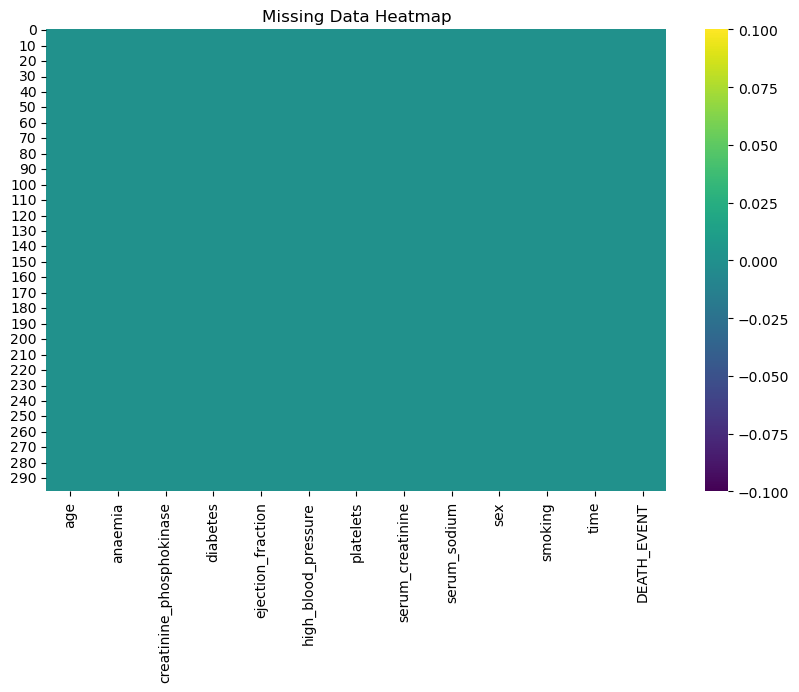

In [14]:
# Missing Values Identification Using Visual Tool
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [15]:
# Duplicate Records
duplicate_rows = df[df.duplicated()]
print(f'Numer of duplicate rows: {duplicate_rows.shape[0]}')

Numer of duplicate rows: 0


In [16]:
# Uniquess of Categorical Variables (For unexpected values)
print(df['anaemia'].unique())
print(df['high_blood_pressure'].unique())
print(df['sex'].unique())
print(df['diabetes'].unique())
print(df['smoking'].unique())
print(df['DEATH_EVENT'].unique())

[False  True]
[ True False]
[ True False]
[False  True]
[False  True]
[ True False]


## Content Investigation

### Part 1: Distribution and Outliers for Numerical Variables

In [17]:
# Summary Statistics for Numerical Variables
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


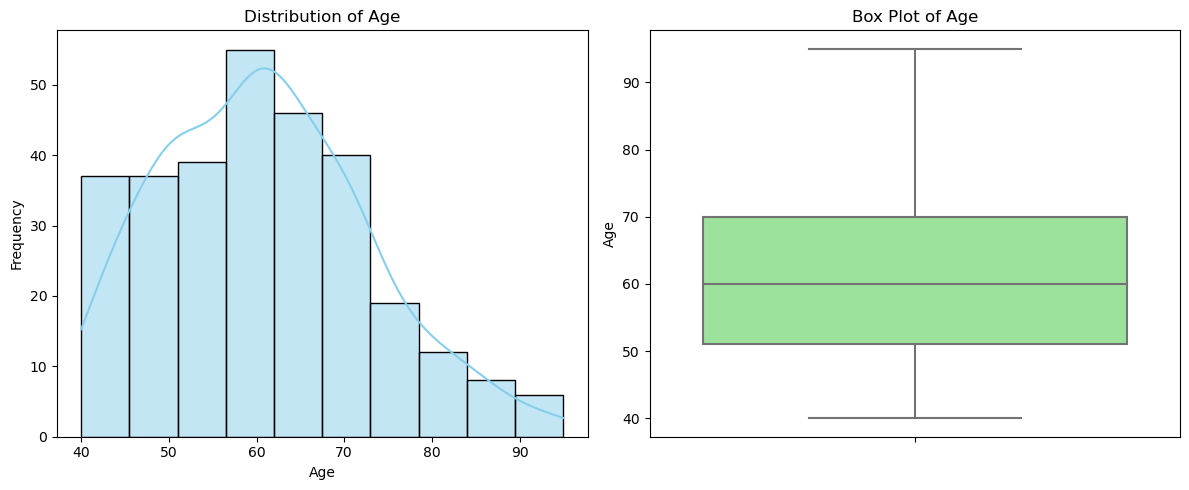

In [18]:
# Individual Variable Analysis - Age

# Create a histogram for variable 'Age' to see the distribution
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


# Create a boxplot for variable 'Age'
plt.subplot(1,2,2)
sns.boxplot(y=df['age'], color='lightgreen')
plt.title('Box Plot of Age')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

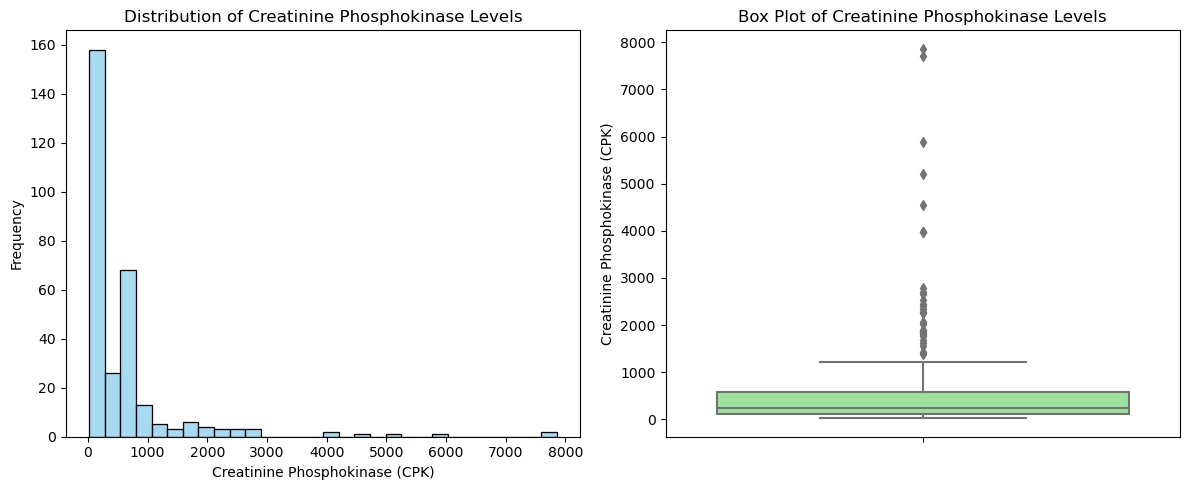

In [19]:
# Individual Variable Analysis - Creatinine Phosphokinase

# Create histogram for CPK levels
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['creatinine_phosphokinase'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Creatinine Phosphokinase Levels')
plt.xlabel('Creatinine Phosphokinase (CPK)')
plt.ylabel('Frequency')

# Create box plot for CPK levels
plt.subplot(1,2,2)
sns.boxplot(y=df['creatinine_phosphokinase'], color='lightgreen')
plt.title('Box Plot of Creatinine Phosphokinase Levels')
plt.ylabel('Creatinine Phosphokinase (CPK)')

plt.tight_layout()
plt.show()

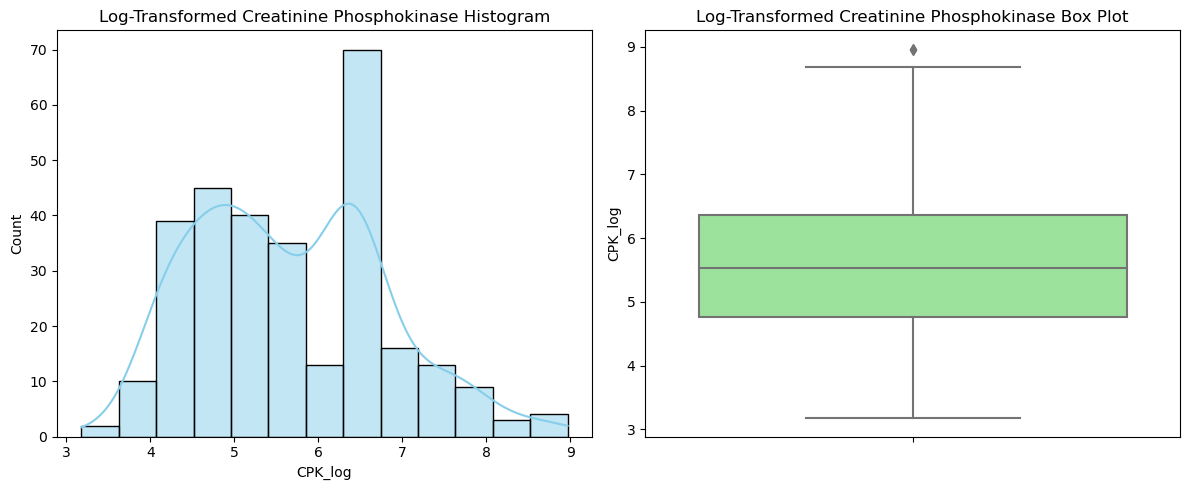

In [20]:
# Handling Extreme Values in Variable 'Creatinine_Phosphokinase' using Log Transformation

# Create a new column with log-transformed CPK levels
df['CPK_log'] = np.log(df['creatinine_phosphokinase'] + 1)

# Histogram for transformed CPK
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['CPK_log'], kde=True, color='skyblue')
plt.title('Log-Transformed Creatinine Phosphokinase Histogram')

# Box plot for transformed CPK
plt.subplot(1,2,2)
sns.boxplot(y=df['CPK_log'], color='lightgreen')
plt.title('Log-Transformed Creatinine Phosphokinase Box Plot')

plt.tight_layout()
plt.show()

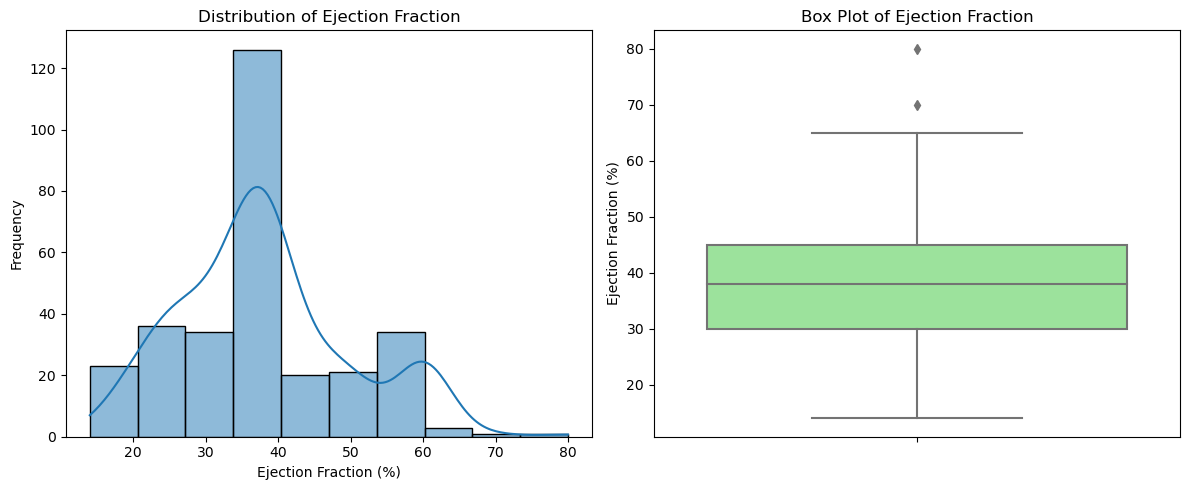

In [21]:
# Individual Variable Analysis - Ejection Fraction

# Histogram for 'ejection_fraction'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['ejection_fraction'], bins=10, kde=True)
plt.title('Distribution of Ejection Fraction')
plt.xlabel('Ejection Fraction (%)')
plt.ylabel('Frequency')

# Box plot for 'ejection_fraction'
plt.subplot(1,2,2)
sns.boxplot(y=df['ejection_fraction'], color='lightgreen')
plt.title('Box Plot of Ejection Fraction')
plt.ylabel('Ejection Fraction (%)')

plt.tight_layout()
plt.show()

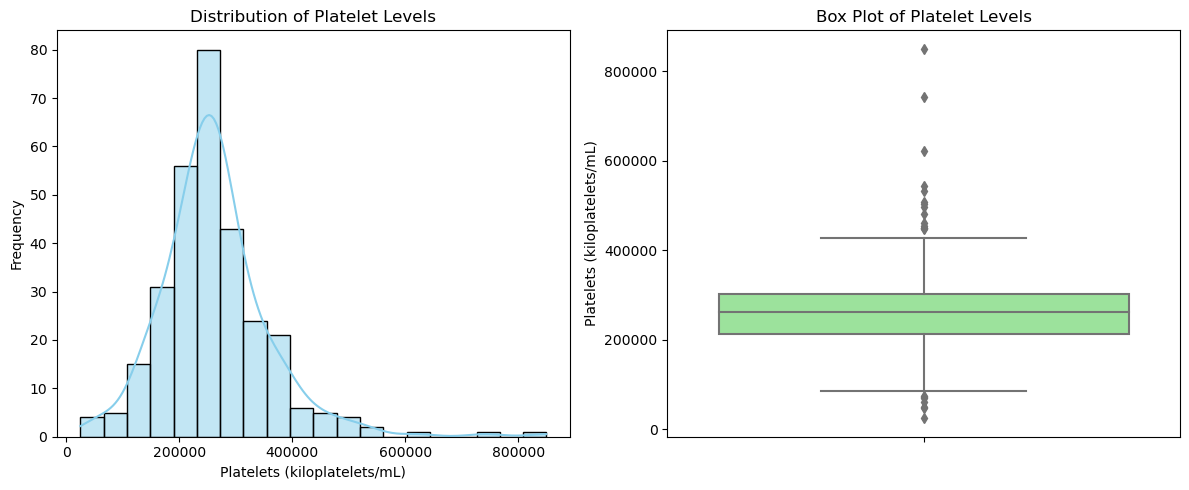

In [22]:
# Individual Variable Analysis - Platelets

# Histogram for 'platelets'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['platelets'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Platelet Levels')
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.ylabel('Frequency')

# Box plot for 'platelets'
plt.subplot(1,2,2)
sns.boxplot(y=df['platelets'], color='lightgreen')
plt.title('Box Plot of Platelet Levels')
plt.ylabel('Platelets (kiloplatelets/mL)')

plt.tight_layout()
plt.show()

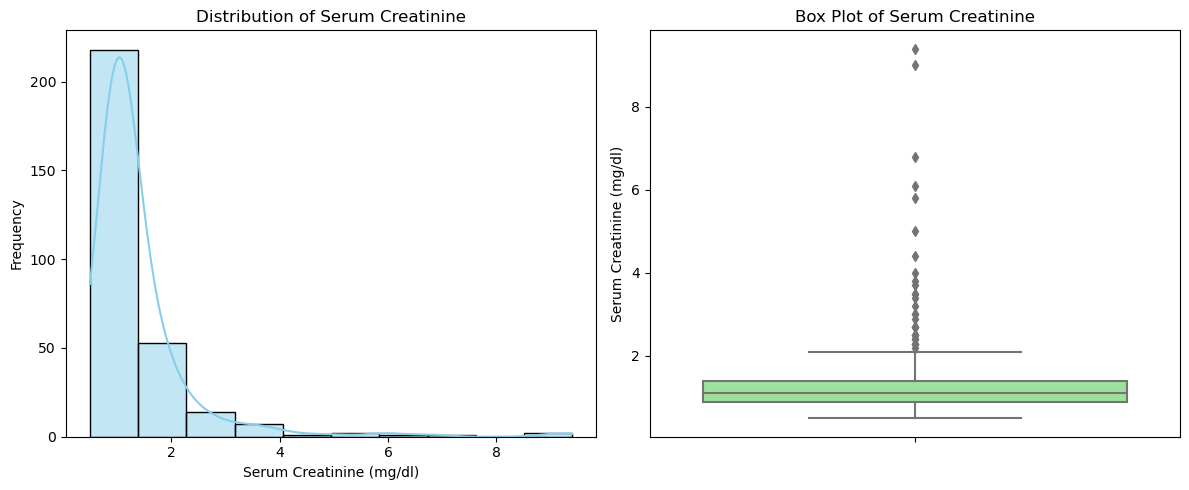

In [23]:
# Individual Variable Analysis - Serum Creatinine

# Histogram for 'serum_creatinine'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['serum_creatinine'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Serum Creatinine')
plt.xlabel('Serum Creatinine (mg/dl)')
plt.ylabel('Frequency')

# Box plot for 'serum_creatinine'
plt.subplot(1,2,2)
sns.boxplot(y=df['serum_creatinine'], color='lightgreen')
plt.title('Box Plot of Serum Creatinine')
plt.ylabel('Serum Creatinine (mg/dl)')

plt.tight_layout()
plt.show()

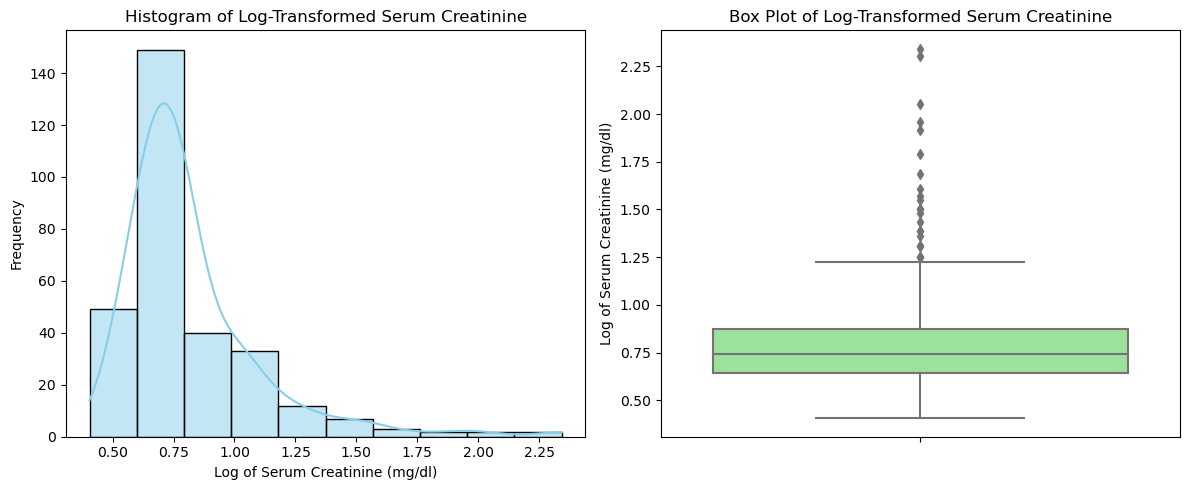

In [24]:
# Handling Extreme Values in Variable 'Serum_Creatinine' using Log Transformation
df['serum_creatinine_log'] = np.log(df['serum_creatinine'] + 1)

# Histogram after log transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['serum_creatinine_log'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Log-Transformed Serum Creatinine')
plt.xlabel('Log of Serum Creatinine (mg/dl)')
plt.ylabel('Frequency')

# Box plot after log transformation
plt.subplot(1,2,2)
sns.boxplot(y=df['serum_creatinine_log'], color='lightgreen')
plt.title('Box Plot of Log-Transformed Serum Creatinine')
plt.ylabel('Log of Serum Creatinine (mg/dl)')

plt.tight_layout()
plt.show()

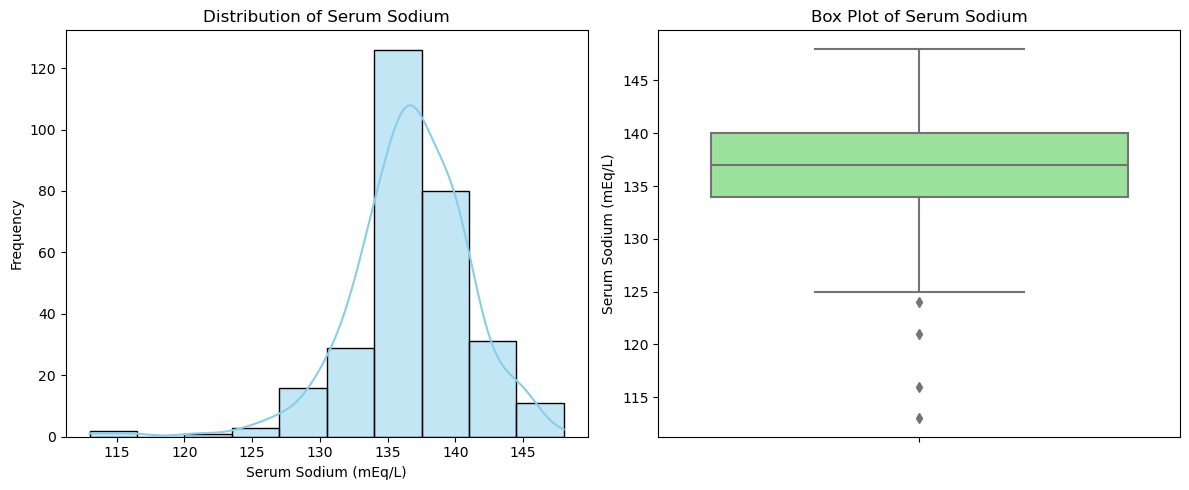

In [25]:
# Individual Variable Analysis - Serum Sodium

# Histogram for 'serum_sodium'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['serum_sodium'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Serum Sodium')
plt.xlabel('Serum Sodium (mEq/L)')
plt.ylabel('Frequency')

# Box plot for 'serum_sodium'
plt.subplot(1,2,2)
sns.boxplot(y=df['serum_sodium'], color='lightgreen')
plt.title('Box Plot of Serum Sodium')
plt.ylabel('Serum Sodium (mEq/L)')

plt.tight_layout()
plt.show()

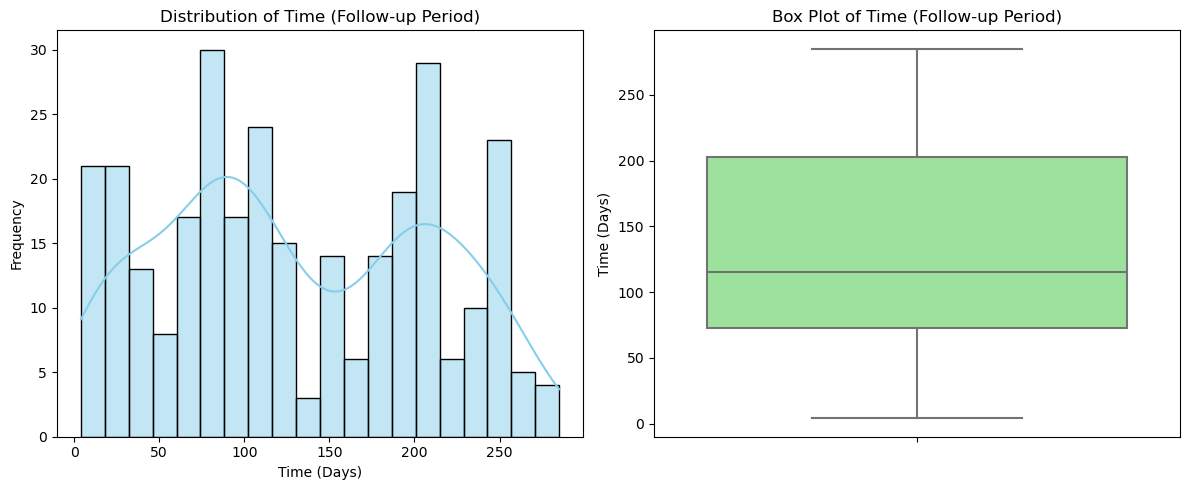

In [26]:
# Individual Variable Analysis - Time

# Histogram for 'time'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['time'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Time (Follow-up Period)')
plt.xlabel('Time (Days)')
plt.ylabel('Frequency')

# Box plot for 'time'
plt.subplot(1,2,2)
sns.boxplot(y=df['time'], color='lightgreen')
plt.title('Box Plot of Time (Follow-up Period)')
plt.ylabel('Time (Days)')

plt.tight_layout()
plt.show()

### Part 2: Imbalances Checking for Categorical Variables

In [27]:
print(f'Categorcal Variables:', categorical_cols)

Categorcal Variables: Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'DEATH_EVENT'],
      dtype='object')


In [28]:
# Check value counts for each categorical variable
for var in categorical_cols:
    print(f'Value counts for {var}:')
    print(df[var].value_counts(), '\n')

Value counts for anaemia:
False    170
True     129
Name: anaemia, dtype: int64 

Value counts for diabetes:
False    174
True     125
Name: diabetes, dtype: int64 

Value counts for high_blood_pressure:
False    194
True     105
Name: high_blood_pressure, dtype: int64 

Value counts for sex:
True     194
False    105
Name: sex, dtype: int64 

Value counts for smoking:
False    203
True      96
Name: smoking, dtype: int64 

Value counts for DEATH_EVENT:
False    203
True      96
Name: DEATH_EVENT, dtype: int64 



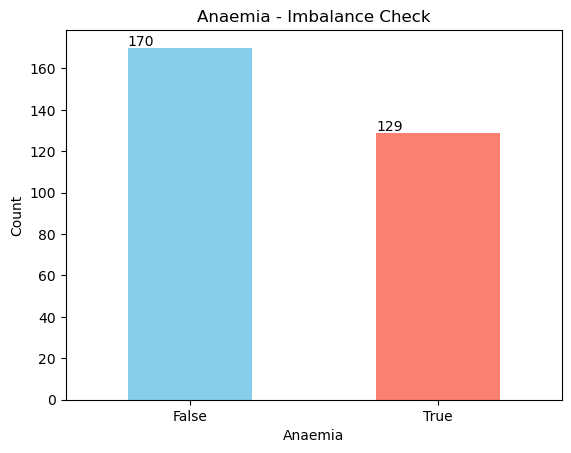

In [29]:
# Visualizing imbalances using bar chart -- Anaemia
ax=df['anaemia'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'Anaemia - Imbalance Check')
plt.xlabel('Anaemia')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

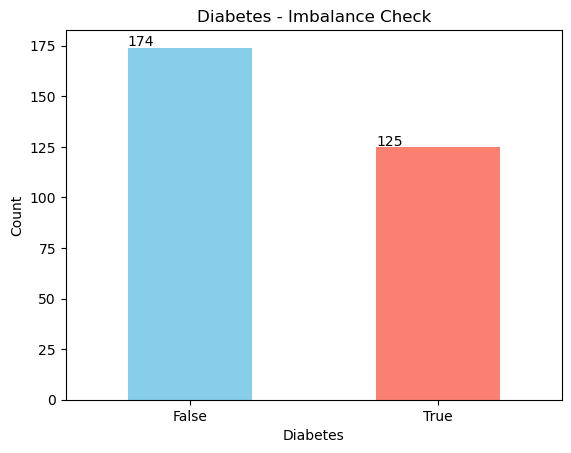

In [30]:
# Visualizing imbalances using bar chart -- Diabetes
ax=df['diabetes'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'Diabetes - Imbalance Check')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

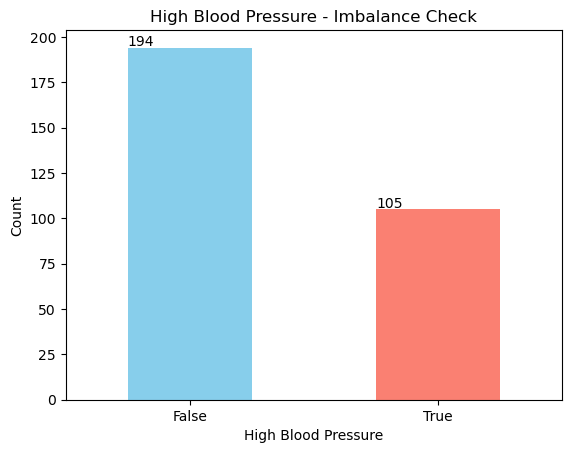

In [31]:
# Visualizing imbalances using bar chart -- High_Blood_Pressure
ax=df['high_blood_pressure'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'High Blood Pressure - Imbalance Check')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

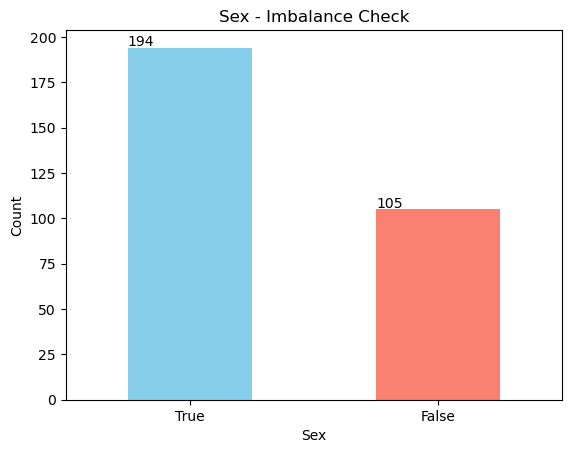

In [32]:
# Visualizing imbalances using bar chart -- Sex
ax=df['sex'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'Sex - Imbalance Check')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

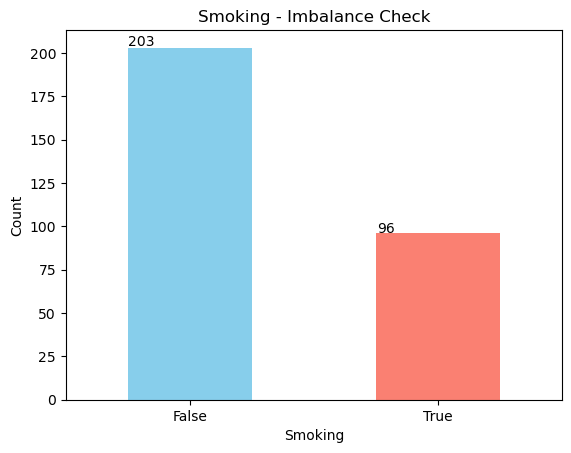

In [33]:
# Visualizing imbalances using bar chart -- Smoking
ax=df['smoking'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'Smoking - Imbalance Check')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

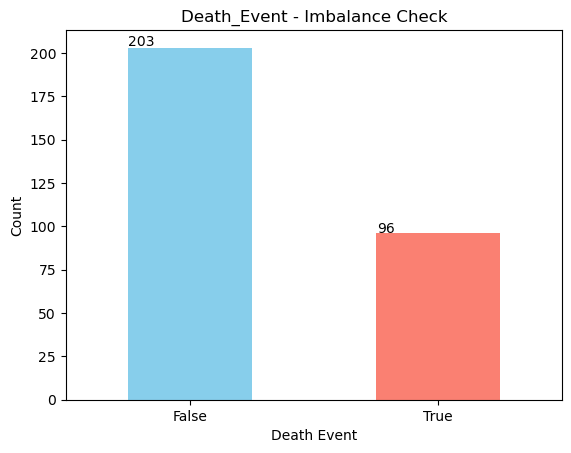

In [34]:
# Visualizing imbalances using bar chart -- DEATH_EVENT
ax=df['DEATH_EVENT'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'Death_Event - Imbalance Check')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#### Handling Imbalanced Data (Not applying for this project but for exploration and learning purposes)

In [35]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Imbalance Data Handling for Variable 'High_Blood_Pressure'

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize the RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Random Oversampling for Variable 'high_blood_pressure'
X_highbp = df.drop(columns=['high_blood_pressure'])
y_highbp = df['high_blood_pressure']
X_highbp_resampled, y_highbp_resampled = oversample.fit_resample(X_highbp, y_highbp)

print(f'After oversampling - high blood pressure: {Counter(y_highbp_resampled)}')

After oversampling - high blood pressure: Counter({True: 194, False: 194})


In [37]:
# Imbalance Data Handling for Variable 'Sex'

# Random Oversampling for Variable 'sex'
X_sex = df.drop(columns=['sex'])
y_sex = df['sex']
X_sex_resampled, y_sex_resampled = oversample.fit_resample(X_sex, y_sex)

print(f'After oversampling - sex: {Counter(y_sex_resampled)}')

After oversampling - sex: Counter({True: 194, False: 194})


In [38]:
# Imbalance Data Handling for Variable 'Smoking'

# Random Oversampling for Variable 'Smoking'
X_smoking = df.drop(columns=['smoking'])
y_smoking = df['smoking']
X_smoking_resampled, y_smoking_resampled = oversample.fit_resample(X_smoking, y_smoking)

print(f'After oversampling - smoking: {Counter(y_smoking_resampled)}')

After oversampling - smoking: Counter({False: 203, True: 203})


In [39]:
# Imbalance Data Handling for Variable 'DEATH_EVENT'

# Random Oversampling for Variable 'DEATH_EVENT'
X_death_event = df.drop(columns=['DEATH_EVENT'])
y_death_event = df['DEATH_EVENT']
X_death_event_resampled, y_death_event_resampled = oversample.fit_resample(X_death_event, y_death_event)

print(f'After oversampling - DEATH_EVENT: {Counter(y_death_event_resampled)}')

After oversampling - DEATH_EVENT: Counter({True: 203, False: 203})


### Part 3: Relationships Exploration

#### Hypothesis 1: Older patients are more likely to experience heart failure-related mortality (age vs DEATH_EVENT)

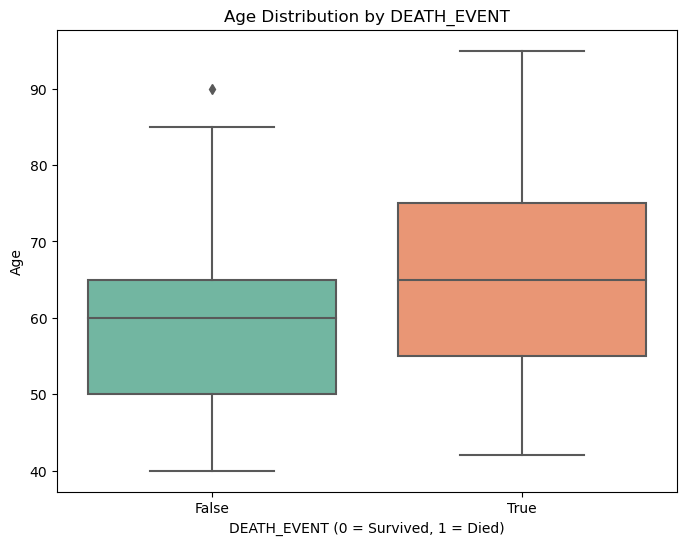

In [40]:
# Box plot to compare age distribution for DEATH_EVENT
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df, palette='Set2')
plt.title('Age Distribution by DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = Survived, 1 = Died)')
plt.ylabel('Age')
plt.show()

In [41]:
# Cross-tabulation

# Categorize variable 'age' into age groups
# Define age bins and labels
bins = [0, 50, 60, 70, 120]
labels = ['<50', '50-60', '60-70', '>70']

# Create a new column 'age_group' by binning 'age'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Cross-tabulation between age_group and DEATH_EVENT
age_death_tab = pd.crosstab(df['age_group'], df['DEATH_EVENT'])
print(age_death_tab)

DEATH_EVENT  False  True
age_group               
<50             36    11
50-60           62    20
60-70           66    27
>70             39    38


In [42]:
# Chi-Square Test

from scipy.stats import chi2_contingency

# Perform the Chi-Square test on the cross-tabulation table
chi2_stat, p_val, dof, expected = chi2_contingency(age_death_tab)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequency Table:")
print(expected)

Chi-Square Statistic: 14.77965707917522
P-value: 0.0020149650605656927
Degrees of Freedom: 3
Expected Frequency Table:
[[31.909699   15.090301  ]
 [55.6722408  26.3277592 ]
 [63.14046823 29.85953177]
 [52.27759197 24.72240803]]


#### Hypothesis 2: The mortality rate is higher for patients suffering from anaemia when contrasted with those who do not (anaemia vs DEATH_EVENT)

In [43]:
# Cross-tabulation of 'anaemia' and 'DEATH_EVENT'
anaemia_death_tab = pd.crosstab(df['anaemia'], df['DEATH_EVENT'])
print("Cross-tabulation of anaemia and DEATH_EVENT:\n", anaemia_death_tab)

Cross-tabulation of anaemia and DEATH_EVENT:
 DEATH_EVENT  False  True
anaemia                 
False          120    50
True            83    46


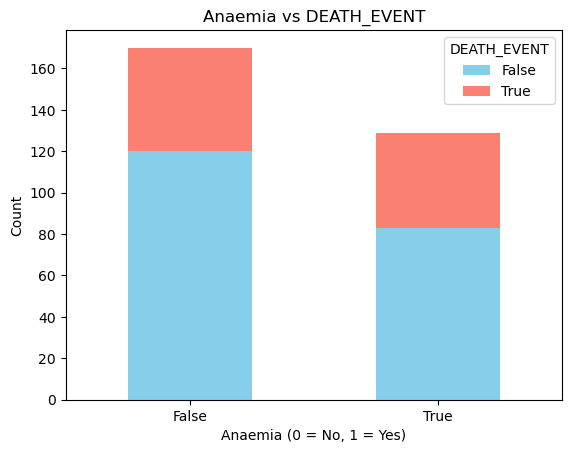

In [44]:
# Visualization: Stacked bar plot
anaemia_death_tab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Anaemia vs DEATH_EVENT')
plt.xlabel('Anaemia (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [45]:
# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(anaemia_death_tab)
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequency Table:\n{expected}")


Chi-Square Statistic: 1.042175485287005
P-value: 0.3073160508415107
Degrees of Freedom: 1
Expected Frequency Table:
[[115.4180602  54.5819398]
 [ 87.5819398  41.4180602]]


#### Hypothesis 3: The risk of mortality increases as the ejection fraction decreases (ejection_fraction vs DEATH_EVENT)

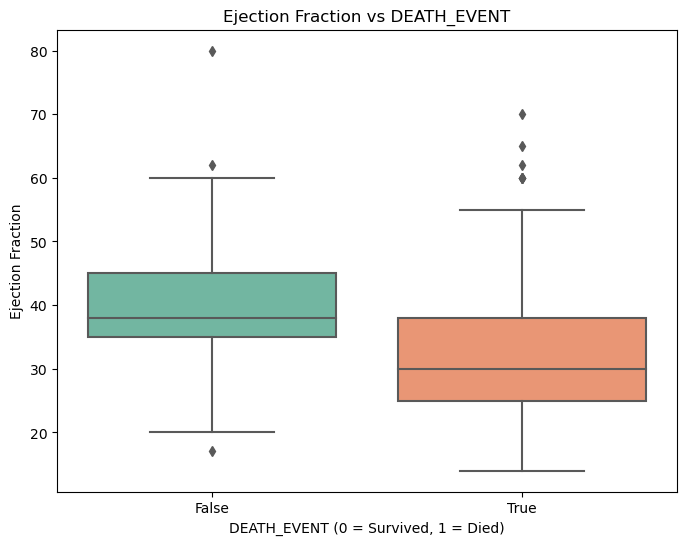

In [46]:
# Create the boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, palette='Set2')
plt.title('Ejection Fraction vs DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = Survived, 1 = Died)')
plt.ylabel('Ejection Fraction')
plt.show()

In [47]:
# Independent Sample T-test
from scipy.stats import ttest_ind

# Separate the ejection_fraction by DEATH_EVENT groups
ejection_fraction_survived = df[df['DEATH_EVENT'] == 0]['ejection_fraction']
ejection_fraction_died = df[df['DEATH_EVENT'] == 1]['ejection_fraction']

# Perform the Independent T-test
t_stat, p_value = ttest_ind(ejection_fraction_survived, ejection_fraction_died)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 4.80562826839639
P-value: 2.452897418208845e-06


#### Hypothesis 4: high blood pressure sufferers are more likely to experience fatality related to heart failure (high_blood_pressure vs DEATH_EVENT)

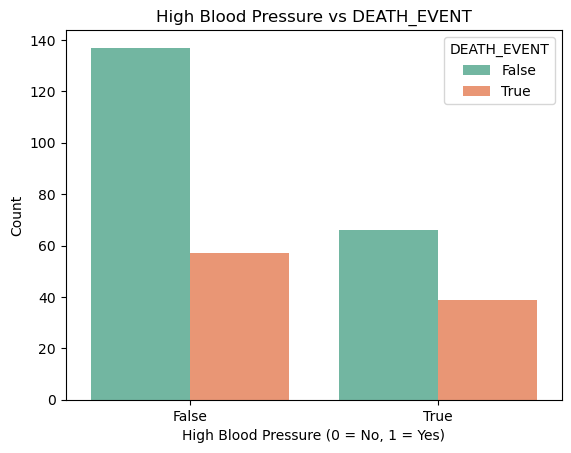

In [48]:
# Create Bar Plot
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df, palette='Set2')
plt.title('High Blood Pressure vs DEATH_EVENT')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='DEATH_EVENT', loc='upper right')
plt.show()

In [49]:
# Cross-tabulation
highbp_death_tab = pd.crosstab(df['high_blood_pressure'], df['DEATH_EVENT'])
print(highbp_death_tab)

DEATH_EVENT          False  True
high_blood_pressure             
False                  137    57
True                    66    39


In [50]:
# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(highbp_death_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Chi-Square Statistic: 1.5434607612967581
P-value: 0.21410341199416902
Degrees of Freedom: 1
Expected Frequency Table:
[[131.71237458  62.28762542]
 [ 71.28762542  33.71237458]]


#### Additional Exploration 1: serum_creatinine vs DEATH_EVENT

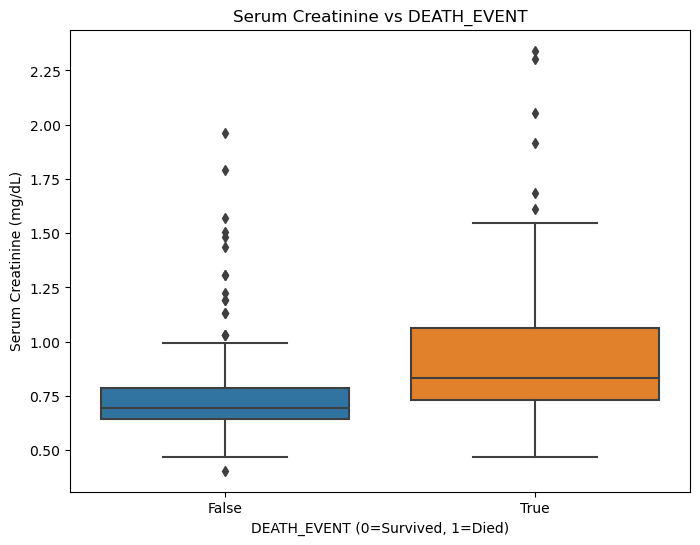

In [51]:
# Create Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine_log', data=df)
plt.title('Serum Creatinine vs DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0=Survived, 1=Died)')
plt.ylabel('Serum Creatinine (mg/dL)')
plt.show()

In [52]:
# Independent Sample T-test

# Separate the serum_creatinine_log by DEATH_EVENT groups
serumcreatinine_log_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine_log']
serumcreatinine_log_died = df[df['DEATH_EVENT'] == 1]['serum_creatinine_log']

# Perform the Independent T-test
t_stat, p_value = ttest_ind(serumcreatinine_log_survived, serumcreatinine_log_died)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -6.358243613091215
P-value: 7.681390341203822e-10


#### Additional Exploration 2: serum_sodium vs DEATH_EVENT

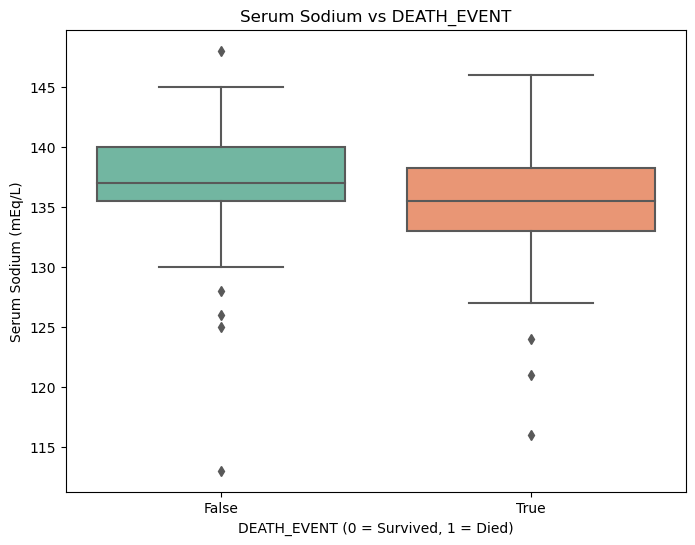

In [53]:
# Create Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df, palette='Set2')
plt.title('Serum Sodium vs DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = Survived, 1 = Died)')
plt.ylabel('Serum Sodium (mEq/L)')
plt.show()

In [54]:
# Independent Sample T-test

# Separate the serum_sodium by DEATH_EVENT groups
serum_sodium_survived = df[df['DEATH_EVENT'] == 0]['serum_sodium']
serum_sodium_died = df[df['DEATH_EVENT'] == 1]['serum_sodium']

# Perform the Independent T-test
t_stat, p_value = ttest_ind(serum_sodium_survived, serum_sodium_died)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 3.4300628699776157
P-value: 0.0006889112363763486


#### Additional Exploration 3: platelets vs DEATH_EVENT

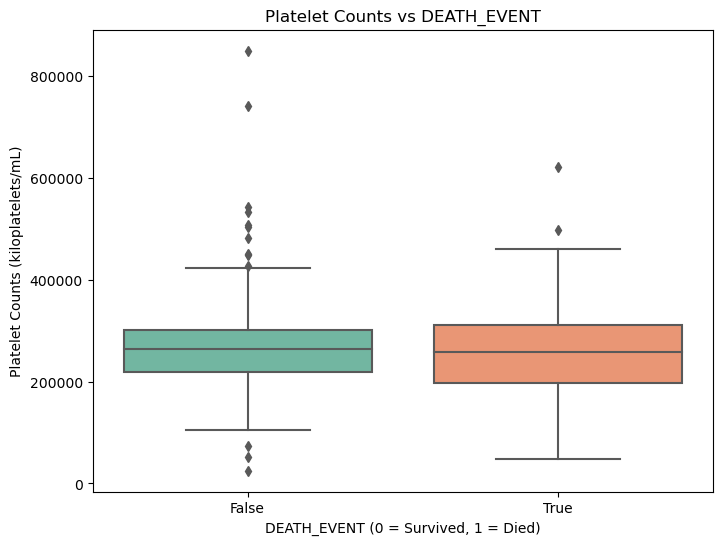

In [55]:
# Create Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT', y='platelets', data=df, palette='Set2')
plt.title('Platelet Counts vs DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = Survived, 1 = Died)')
plt.ylabel('Platelet Counts (kiloplatelets/mL)')
plt.show()

In [56]:
# Independent Sample T-test

# Separate the platelets by DEATH_EVENT groups
platelets_survived = df[df['DEATH_EVENT'] == 0]['platelets']
platelets_died = df[df['DEATH_EVENT'] == 1]['platelets']

# Perform the Independent T-test
t_stat, p_value = ttest_ind(platelets_survived, platelets_died)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 0.8478681784251544
P-value: 0.3971941540413678


#### Additional Exploration 4: diabetes vs DEATH_EVENT

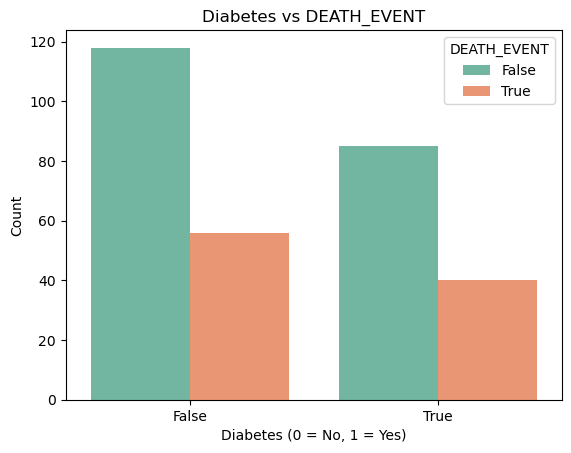

In [57]:
# Create bar plots
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df, palette='Set2')
plt.title('Diabetes vs DEATH_EVENT')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='DEATH_EVENT', loc='upper right')
plt.show()

In [58]:
# Cross-tabulation of 'diabetes' and 'DEATH_EVENT'
diabetes_death_tab = pd.crosstab(df['diabetes'], df['DEATH_EVENT'])
print("Cross-tabulation of diabetes and DEATH_EVENT:\n", diabetes_death_tab)

Cross-tabulation of diabetes and DEATH_EVENT:
 DEATH_EVENT  False  True
diabetes                
False          118    56
True            85    40


In [59]:
# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(diabetes_death_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequency Table:
[[118.13377926  55.86622074]
 [ 84.86622074  40.13377926]]


In [ ]:
# END